## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from scipy import stats as st
import statistics 
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "png"

Сохраним в переменной df данные по клиентам банка

In [2]:
df = pd.read_csv('N1ARjy2XSAZ7IlQqGjeqP0F')

Выведем первые 10 строк для ознакомления с данными.

In [3]:
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Получим общую информацию по данным.

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Переименуем названия столбцов USERID и EST_SALARY для удобства и сохранения стиля.

In [5]:
df = df.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})

Проверим результат.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Проверим, какие значения имеются в столбце 'city'.

In [7]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Проверим, какие значения имеются в столбце 'gender'.

In [8]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

Проверим, какие значения имеются в столбце 'credit_card'.

In [9]:
df['credit_card'].unique()

array([0, 1], dtype=int64)

Проверим, какие значения имеются в столбце 'last_activity'.

In [10]:
df['last_activity'].unique()

array([1, 0], dtype=int64)

Проверим, какие значения имеются в столбце 'churn'.

In [11]:
df['churn'].unique()

array([1, 0], dtype=int64)

На данном этапе исследования получили общую информацию о данных и их структуре.

## Предобработка данных.

Как видно из ощей информации о данных, столбец 'balance' имеет большое количество пропусков. Данный столбец отображает баланс счета. Количество значений в данном стодлбц значительно и удаление строк с пропусками или замена их на какое либо значение может повлиять на результаты исследования. Лучше оставить пропуски как есть.

Теперь проверим данные на наличие явных дубликатов.

In [12]:
df.duplicated().sum()

0

Явных дубликатов в данных нет.

Проверим, есть ли пользователи с одинаковыми id.

In [13]:
df['user_id'].nunique()

9927

Как видим имеются пользователи с одинаковыми id. Выведем этих пользователей.

In [14]:
df_duplicated = df[df.duplicated(['user_id'])] # Получили датафрейм с id пользователей, которые дублируются

In [15]:
duplicat = df_duplicated['user_id'].to_list() # Превратили в список столбец с номерами id

In [16]:
df_duplicated_all = df.query('user_id == @duplicat') # Получили датафрейм с пользователями, чьи id одинаковы

In [17]:
pd.set_option('display.max_rows', None) # Установим полное отображение строк

In [18]:
df_duplicated_all.sort_values(by='user_id').reset_index(drop=True) # Выведем пользователей с одинаковыми 
                                                                   #id для визуальной оценки

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
1,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
2,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
3,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
4,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
6,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
7,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Скорее всего проблема дублирования id в технической ошибке присваивания id. При чем видно, что ошибка происходила только между городами Ярославль и Рыбинск, а именно, id клиента из одного города дублировал id клиента из другого. Дублирование id внутри одного города не происходило. Можно сделать выводы, что несмотря на дублирование id, остальные данные верны. Оставим повторяющиеся id.

Как видим у нас есть еще пропуски в строке 'age'. Восстановить мы их не можем. Удалим строки с пропусками в данных строках.

In [19]:
df = df.dropna(subset=['age']) # Удаляем пропуски

Проанализируем пропуски в столбце 'balance'. 

In [20]:
data_1 = df.loc[:, ['city', 'gender', 'age', 'equity', 'balance', 'products', 'est_salary']]
# Cоздадим отдельную переменную, в которой сохраним значения, по которым будем оценивать 
# зависимость пропусков от данных и отнесение к одной из категорий пропусков.

In [21]:
data_1.head()

,city,gender,age,equity,balance,products,est_salary
0,Рыбинск,Ж,25.0,1,59214.82,2,75719.14
1,Рыбинск,Ж,37.0,5,850594.33,3,86621.77
2,Рыбинск,Ж,30.0,0,NaN,1,107683.34
3,Ярославль,Ж,51.0,5,1524746.26,2,174423.53
4,Ярославль,М,34.0,5,174.00,1,67353.16


In [22]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        9974 non-null   object 
 1   gender      9974 non-null   object 
 2   age         9974 non-null   float64
 3   equity      9974 non-null   int64  
 4   balance     7695 non-null   float64
 5   products    9974 non-null   int64  
 6   est_salary  9974 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 623.4+ KB


In [23]:
data_1['balance'] = data_1['balance'].fillna(1) # Заменили пропуски в столбце 'balance' на 1.

In [24]:
data_1_nan = data_1.query('balance == 1') # Создали переменную, в которой сохраним данные с пропусками в столбце 'balance'

In [25]:
data_1_yes = data_1.query('balance != 1') # Создали переменную, в которой сохраним данные с отсутствием пропусков 
# в столбце 'balance'

In [26]:
 data_norm = {'Значение пропущено': [round(data_1_nan['est_salary'].mean(), 2), data_1_nan['age'].median(), 
                                     data_1_nan['products'].median(), data_1_nan['equity'].median(), 
                                     statistics.mode(data_1_nan['city']), statistics.mode(data_1_nan['gender'])],
              'Значение не пропущено' : [round(data_1_yes['est_salary'].mean(), 2), data_1_yes['age'].median(), 
                                         data_1_yes['products'].median(), data_1_yes['equity'].median(), 
                                         statistics.mode(data_1_yes['city']), statistics.mode(data_1_yes['gender'])],
              'Относительная разница' : [round(data_1_nan['est_salary'].mean()/data_1_yes['est_salary'].mean(), 2), 
                                         round(data_1_nan['age'].median()/data_1_yes['age'].median(), 2), 
                                         round(data_1_nan['products'].median()/data_1_yes['products'].median(), 2), 
                                         round(data_1_nan['equity'].median()/data_1_yes['equity'].median(), 2), 
                                         'Nan', 'Nan']}
# Зададим названия столбцов и значений в них

In [27]:
 dt = pd.DataFrame(data_norm, index=['Средняя зарплата', 'Медианный возраст', 'Медианное количество продуктов', 
                                     'Медианное количество собственности', 'Мода по городу', 'Мода по гендеру'])
# Создадим переменную с оценкой данных с пропусками в столбце 'balance' и наличием данных в данной строке.

In [28]:
dt # Выведем результаты

,Значение пропущено,Значение не пропущено,Относительная разница
Средняя зарплата,226345.42,124520.39,1.82
Медианный возраст,40.0,40.0,1.0
Медианное количество продуктов,1.0,2.0,0.5
Медианное количество собственности,0.0,4.0,0.0
Мода по городу,Ярославль,Ярославль,Nan
Мода по гендеру,М,Ж,Nan


Как видим, основыные отличия в двух группах составли средняя заработная плата, медианное количество продуктов и мода по гендеру. Из этого можно сделать выводы, что привязать отсутствующие результаты к конкретной характеристике не получится. Скорее всего Причиной пропуска является техническая ошибка.

In [29]:
df.info() # Проверяем результаты

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


Для удобства переведем данные в столбце 'age' в целочисленные.

In [30]:
df['age'] = df['age'].astype('int64')

In [31]:
df.info() # Проверяем результаты

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


Переименуем значения с столбце chain на более понятные

In [32]:
df['churn'] = df['churn'].replace({0:'остались', 1:'ушли'})

Переименуем значения с столбце credit_card на более понятные

In [33]:
df['credit_card'] = df['credit_card'].replace({0:'нет', 1:'да'})

Переименуем значения с столбце last_activity на более понятные

In [34]:
df['last_activity'] = df['last_activity'].replace({0:'нет', 1:'да'})

Данные для анализа подготовлены. Были проведены следующие действия: поиск явных дубликатов, удаление пользователей с одинаковыми id, удаление пользователей с отсутвующими данными в столбце "age", изменение типа данных в столбце "age", переименование названия столбцов и значений в них на более удобные и соответствующие стилю.

## Анализ данных

In [35]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,нет,да,75719.14,ушли
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,да,нет,86621.77,остались
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,да,да,107683.34,остались
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,нет,да,174423.53,ушли
4,157978,730.0,Ярославль,М,34,5,174.00,1,да,нет,67353.16,ушли


### Соотношение ушедших и оставшихся клиентов банка.

Выясним общий показатель ушедших и оставшихся клиентов в банке.Создадим фрейм с данными по количеству ушедших и оставшихся клиентов.

In [36]:
df_churn = df.groupby('churn').agg({'churn':'count'}) #Сгруппируем данные 

In [37]:
df_churn.columns = ['count'] # Переименуем столбец

In [38]:
df_churn = df_churn.reset_index()# Сбросим индекс

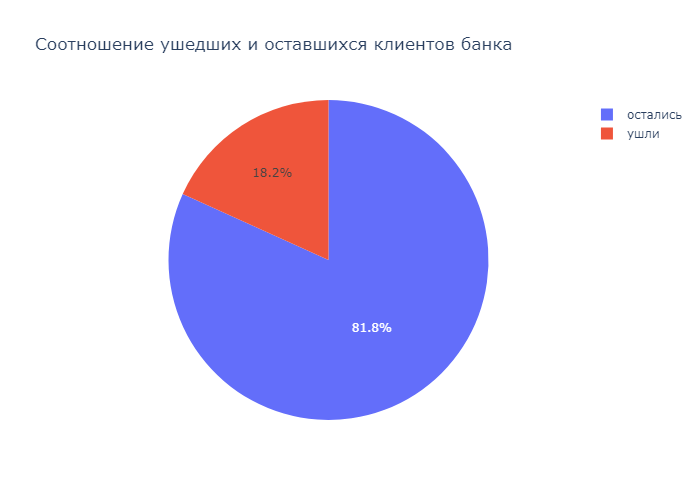

In [39]:
fig = px.pie(df_churn, values='count',  names='churn', title="Соотношение ушедших и оставшихся клиентов банка")
fig.show() #Отобразим графичечки соотношение оставшихся и ушедших клиентов банка.

Как видим, соотношение оставшихся к ушедшим клиентам банка распределилось так - 81.8% и 18.2% соответственно.

### Рассмотрение характеристики "score".

Исходя из показателей выше, а именно, что соотношение оставшихся к ушедшим клиентам банка распределилось так - 81.8% и 18.2% соответственно, мы можем, рассматривать данную характеристики клиентов, о большей или меньшей склонности клиента к уходу. При рассмотрении характеристики процент ушедших клиентов будет выше 18.2% и можно утвержать, что клиенты с данной характеристикой вероятнее всего уйдут. Изобразим график, в котором есть процентное соотношение ушедших и оставшихся клиентов разрезе характеристики "score" и сделаем выводы.

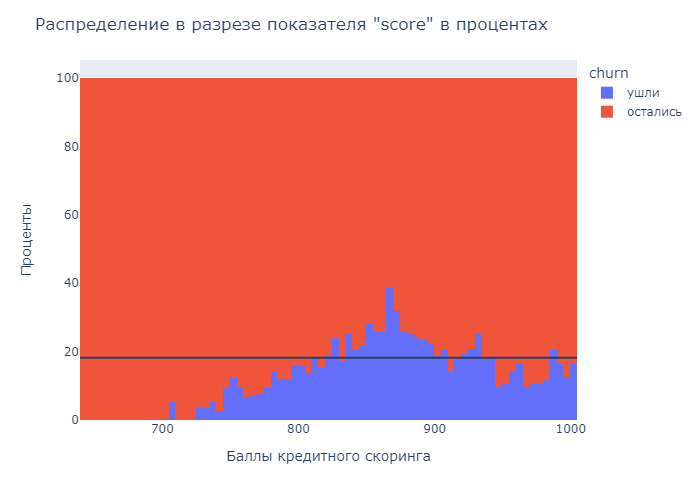

In [40]:
fig = px.histogram(df, x="score", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "score" в процентах', # Название графика
    xaxis_title_text='Баллы кредитного скоринга', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

Для более полного понимания распределени выведем количественный график.

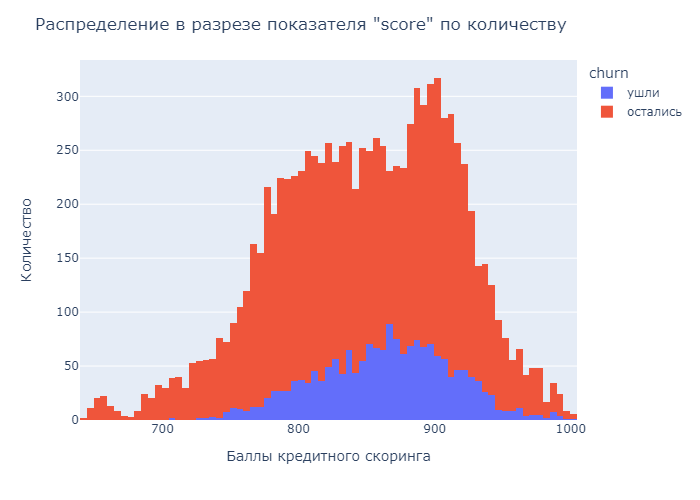

In [41]:
fig = px.histogram(df, x="score", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "score" по количеству', # Название графика
    xaxis_title_text='Баллы кредитного скоринга', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

In [42]:
df_1 = df.query('churn == "ушли"')

In [43]:
df_0 = df.query('churn == "остались"')

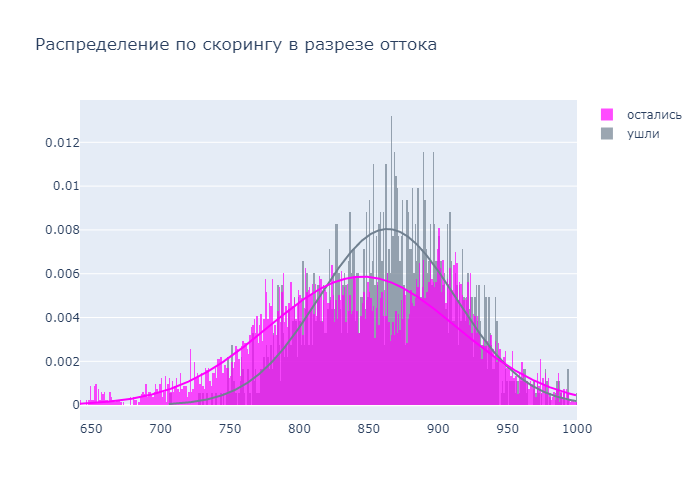

In [44]:
x1 = df_1['score']
x2 = df_0['score']

group_labels = ['ушли', 'остались']

colors = ['slategray', 'magenta']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=1,
                         curve_type='normal', show_rug=False,
                         colors=colors)

fig.update_layout(title_text='Распределение по скорингу в разрезе оттока')
fig.show()

Как видим, в группу риска вошли клиенты чьи балла равны: 810-814, 820-829, 835-909, 920-934, 940-944, 985-989. Однако, стоит отметить, что количество клиентов чей рейтинг выше 965 очень мало.

### Рассмотрение характеристики "city".

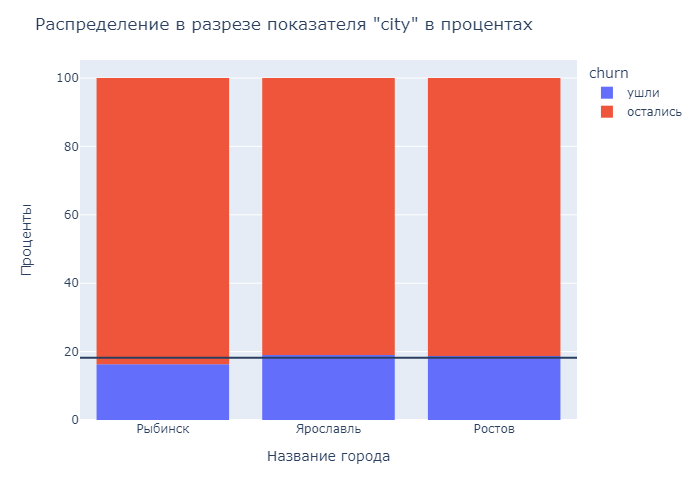

In [45]:
fig = px.histogram(df, x="city", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "city" в процентах', # Название графика
    xaxis_title_text='Название города', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

Для более полного понимания распределени выведем количественный график.

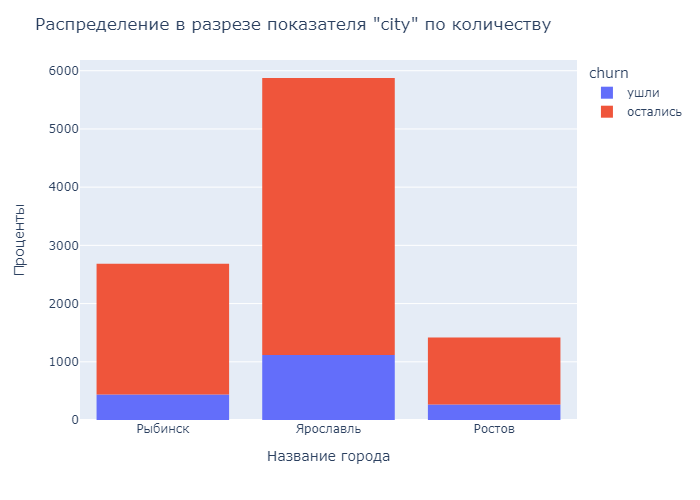

In [46]:
fig = px.histogram(df, x="city", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "city" по количеству', # Название графика
    xaxis_title_text='Название города', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.show()

Как видим, самый низкий процент ушедших клиентов в Рыбинске - 16.28%, далее Ростов - 18.71%, далее Ярославль - 19.01%. Прослеживается небольшая разница в оттоке клиентов в зависимости от города.

### Рассмотрение характеристики "gender".

Рассмотрим влияние гендерного признака.

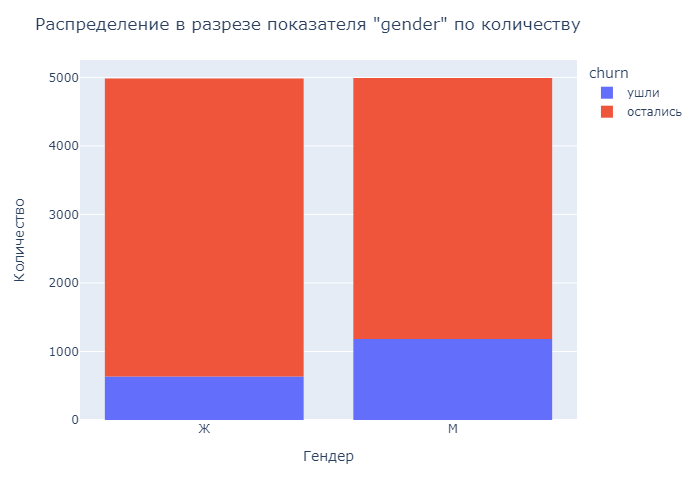

In [47]:
fig = px.histogram(df, x="gender", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "gender" по количеству', # Название графика
    xaxis_title_text='Гендер', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

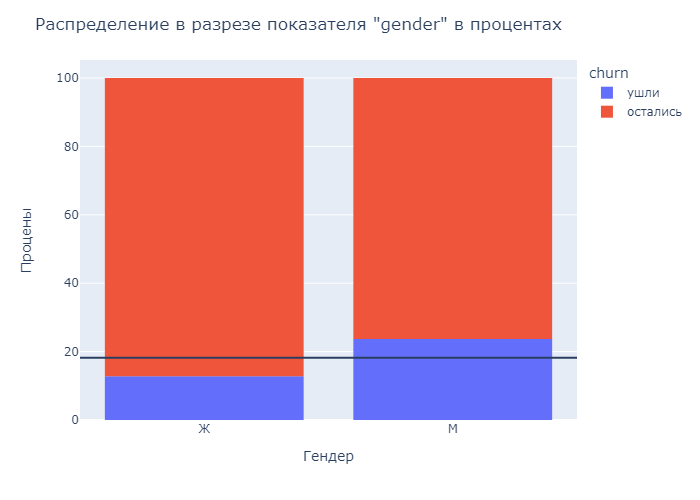

In [48]:
fig = px.histogram(df, x="gender", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "gender" в процентах', # Название графика
    xaxis_title_text='Гендер', # Название оси Х
    yaxis_title_text='Процены', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

Как видим, мужчины более склонны к уходу из банка. Их показатель ухода почти в 2 раза больше.

### Рассмотрение характеристики "age".

Рассмотрим влияние возрастрого признака на уход из банка.

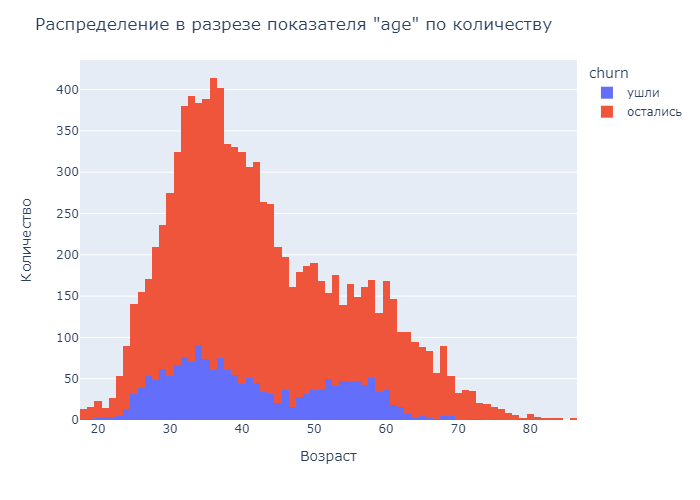

In [49]:
fig = px.histogram(df, x="age", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "age" по количеству', # Название графика
    xaxis_title_text='Возраст', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

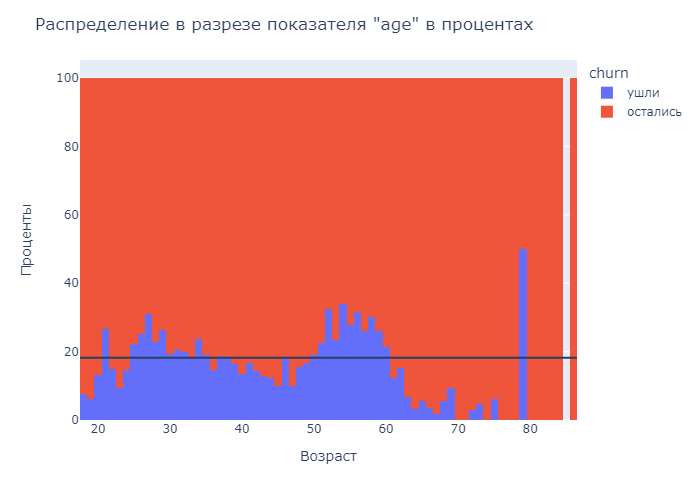

In [50]:
fig = px.histogram(df, x="age", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "age" в процентах', # Название графика
    xaxis_title_text='Возраст', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

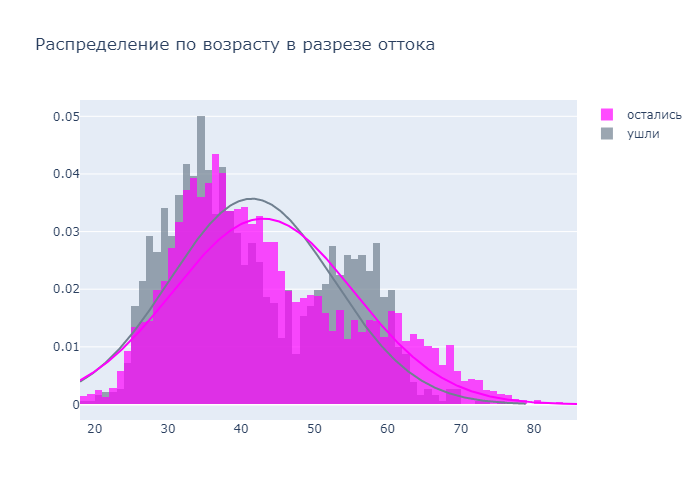

In [51]:
x1 = df_1['age']
x2 = df_0['age']

group_labels = ['ушли', 'остались']

colors = ['slategray', 'magenta']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=1,
                         curve_type='normal', colors=colors, show_rug=False)

fig.update_layout(title_text='Распределение по возрасту в разрезе оттока')
fig.show()

Как видим из данных, клиентов возрастом с 18 до 24 лет и с 65 и старше очень мало. Так же можно заметить, что вероятность ухода высока у клиентом с диапазоном возраста с 25 до 35 лет, а так же с 50 до 60 лет.

### Рассмотрение характеристики "equity".

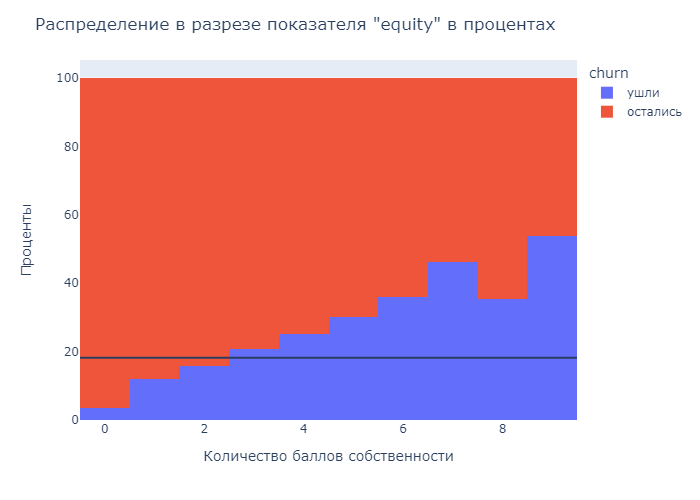

In [52]:
fig = px.histogram(df, x="equity", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "equity" в процентах', # Название графика
    xaxis_title_text='Количество баллов собственности', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

Для более полного понимания распределени выведем количественный график.

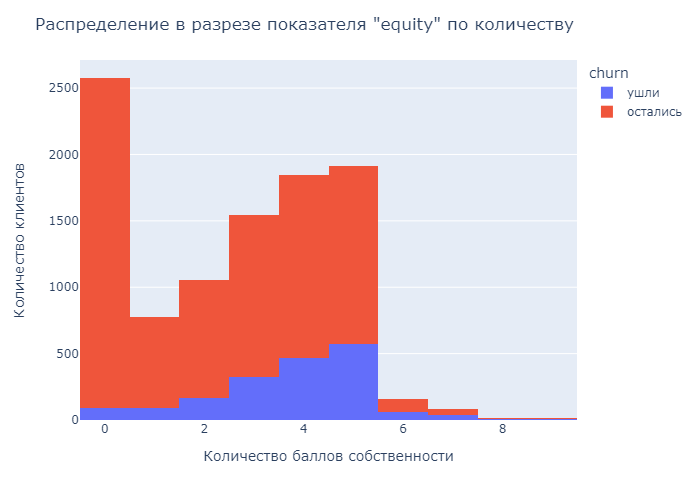

In [53]:
fig = px.histogram(df, x="equity", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "equity" по количеству', # Название графика
    xaxis_title_text='Количество баллов собственности', # Название оси Х
    yaxis_title_text='Количество клиентов', # Название оси У
)
fig.show()

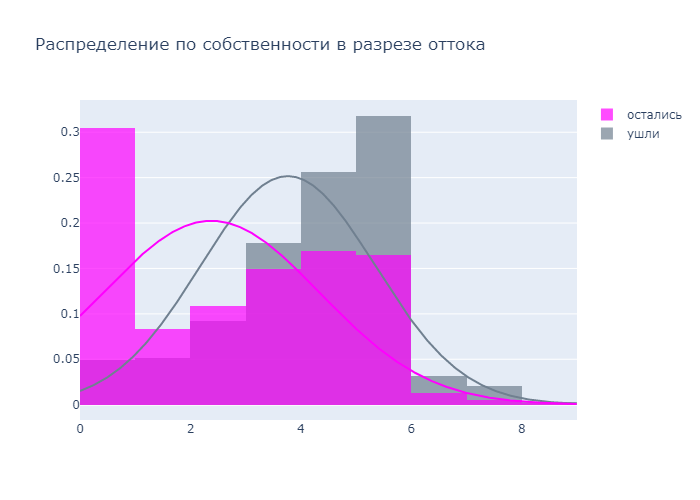

In [54]:
x1 = df_1['equity']
x2 = df_0['equity']

group_labels = ['ушли', 'остались']

colors = ['slategray', 'magenta']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=1,
                         curve_type='normal', colors=colors, show_rug=False)

fig.update_layout(title_text='Распределение по собственности в разрезе оттока')
fig.show()

Из графиков видно, что клиенты с характеристикой "equity" более 2 имеет значительную степень вероятности ухода. При этом можно заметит, что число клиентов с характеристикой "equity"от 6 и более очень мало и их число несущественно.

###  Рассмотрение характеристики "balance".

Рассмотрим влияние баланса на счёте на уход из банка. Перед построением графиков, узнаем распределение баланса клиентов в банке.

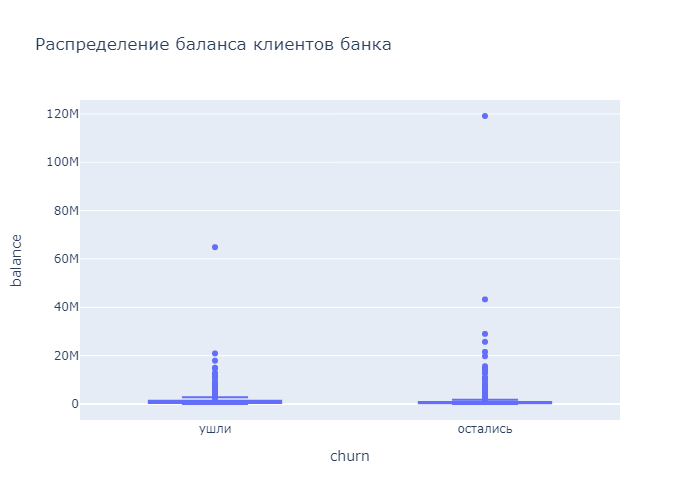

In [55]:
fig = px.box(df, x="churn", y="balance", title="Распределение баланса клиентов банка")
fig.show()

Исходя из полученных данных можно заметить, что максимально возможный потолок баланса ушедших клиентов не входящий в выбросы равен примерно 2 800 000. У оставшихся клиентов эта величина равна примерно 1 717 000. Отсеим клиентов чей баланс более 2 800 000 и сохраним данные по ним в переменной df_balance.

In [56]:
df_balance = df.query('balance <=2800000')

Построим график, отобращающий количественные показатели ушедших и оставшихся клиентов в разрезе баланса.

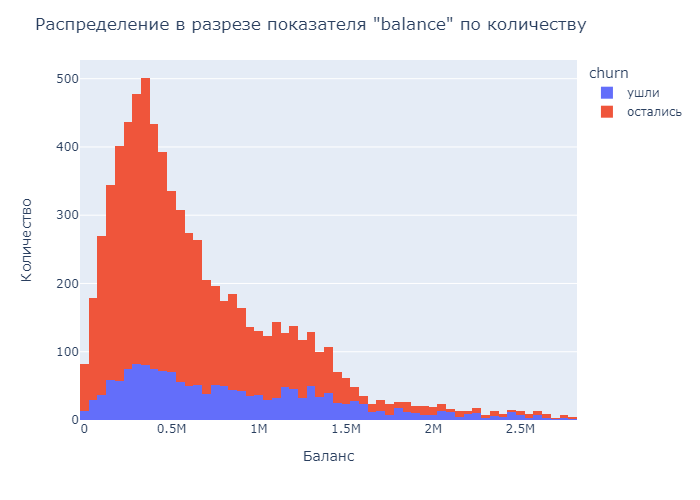

In [57]:
fig = px.histogram(df_balance, x="balance", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "balance" по количеству', # Название графика
    xaxis_title_text='Баланс', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

Построим график, отобращающий процнтное соотношение ушедших и оставшихся клиентов в разрезе баланса.

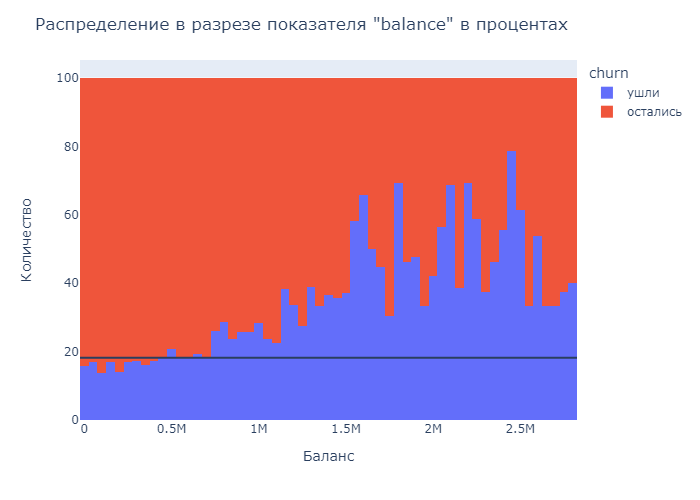

In [58]:
fig = px.histogram(df_balance, x="balance", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "balance" в процентах', # Название графика
    xaxis_title_text='Баланс', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

In [59]:
df_1.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,нет,да,75719.14,ушли
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,нет,да,174423.53,ушли
4,157978,730.0,Ярославль,М,34,5,174.00,1,да,нет,67353.16,ушли
12,132970,845.0,Ярославль,Ж,31,3,591928.52,2,да,да,112697.16,ушли
40,129705,811.0,Рыбинск,М,34,2,129799.35,1,нет,нет,96242.71,ушли


In [60]:
df_1_1 = df_balance.dropna()

In [61]:
df_1_1.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,нет,да,75719.14,ушли
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,да,нет,86621.77,остались
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,нет,да,174423.53,ушли
4,157978,730.0,Ярославль,М,34,5,174.00,1,да,нет,67353.16,ушли
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,да,нет,156619.80,остались


In [62]:
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        7462 non-null   int64  
 1   score          7462 non-null   float64
 2   city           7462 non-null   object 
 3   gender         7462 non-null   object 
 4   age            7462 non-null   int64  
 5   equity         7462 non-null   int64  
 6   balance        7462 non-null   float64
 7   products       7462 non-null   int64  
 8   credit_card    7462 non-null   object 
 9   last_activity  7462 non-null   object 
 10  est_salary     7462 non-null   float64
 11  churn          7462 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 757.9+ KB


In [63]:
df_1_new = df_1_1.query('churn == "ушли"')

In [64]:
df_0_new = df_1_1.query('churn == "остались"')

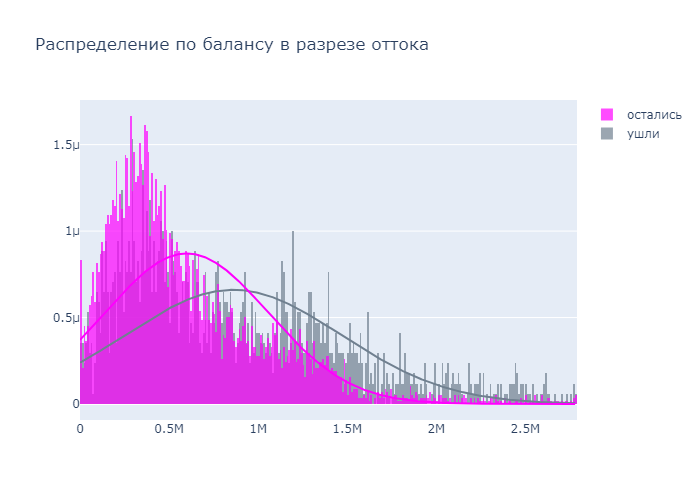

In [65]:
x1 = df_1_new['balance']
x2 = df_0_new['balance']

group_labels = ['ушли', 'остались']

colors = ['slategray', 'magenta']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=10000,
                         curve_type='normal', colors=colors, show_rug=False)

fig.update_layout(title_text='Распределение по балансу в разрезе оттока')
fig.show()

Исходя из полученных данных, можно сделать выводы, что клиенты чей баланс больше 425 000 склонны к уходу, при этом чем больше их баланс от указанной суммы тем выше вероятность их ухода.

###  Рассмотрение характеристики "products".

Рассмотрим влияние количества используемых продуков клиентами на их уход из банка.

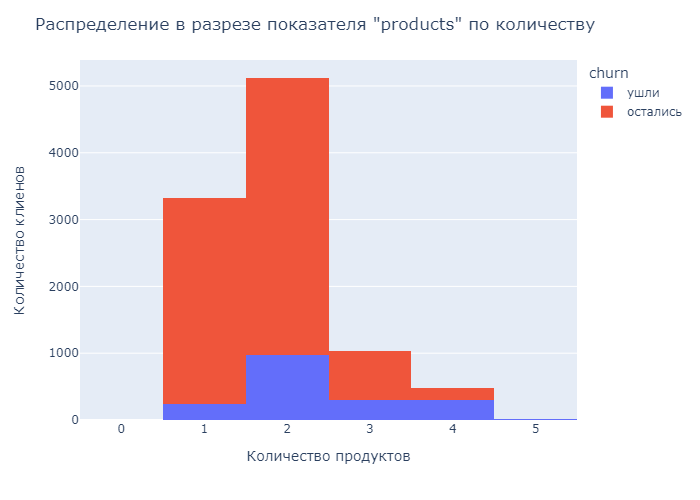

In [66]:
fig = px.histogram(df, x="products", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "products" по количеству', # Название графика
    xaxis_title_text='Количество продуктов', # Название оси Х
    yaxis_title_text='Количество клиенов', # Название оси У
)
fig.show()

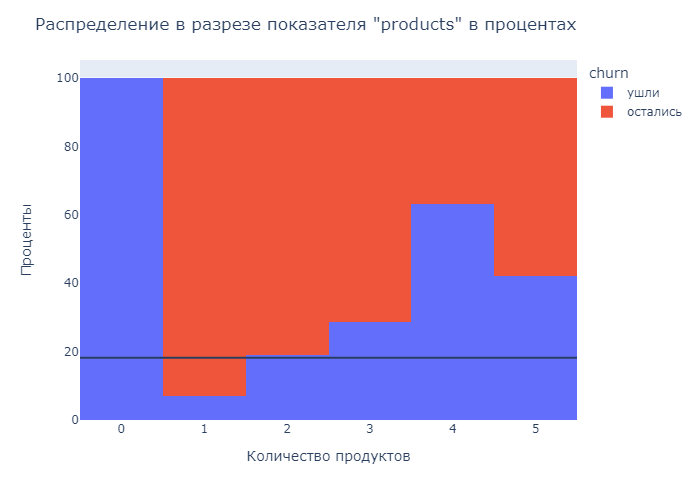

In [67]:
fig = px.histogram(df, x="products", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "products" в процентах', # Название графика
    xaxis_title_text='Количество продуктов', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

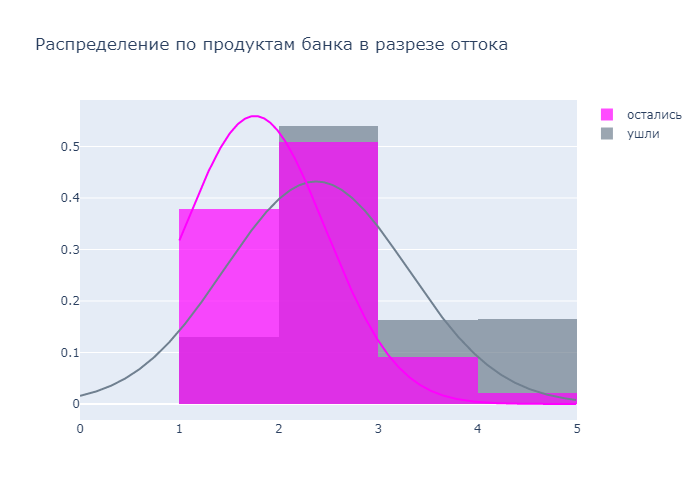

In [68]:
x1 = df_1['products']
x2 = df_0['products']

group_labels = ['ушли', 'остались']

colors = ['slategray', 'magenta']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=1,
                         curve_type='normal', colors=colors, show_rug=False)

fig.update_layout(title_text='Распределение по продуктам банка в разрезе оттока')
fig.show()

Как видим, клиенты, которые не используют ни одного продукта либо пять практически нет. Основную группу составляют клиенты либо с 1 или 2 продуктами. Начиная с клиентов с 2 продуктами по 4 включительно имеют высокую вероятность того, что они уйдут из банка. При этом с увеличением количества продуктов с 2 до 4 увеличивается и вероятность ухода клиента.

###  Рассмотрение характеристики "сredit сard".

Рассмотрим влияние наличия кредитной карты у клиентами на уход из банка.

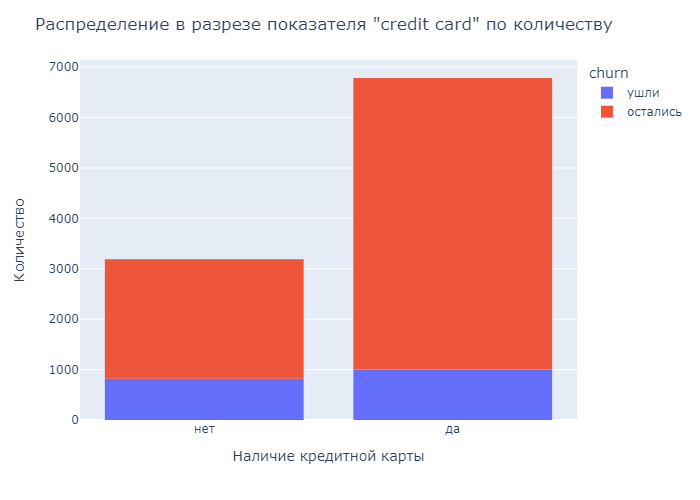

In [69]:
fig = px.histogram(df, x="credit_card", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "сredit сard" по количеству', # Название графика
    xaxis_title_text='Наличие кредитной карты', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

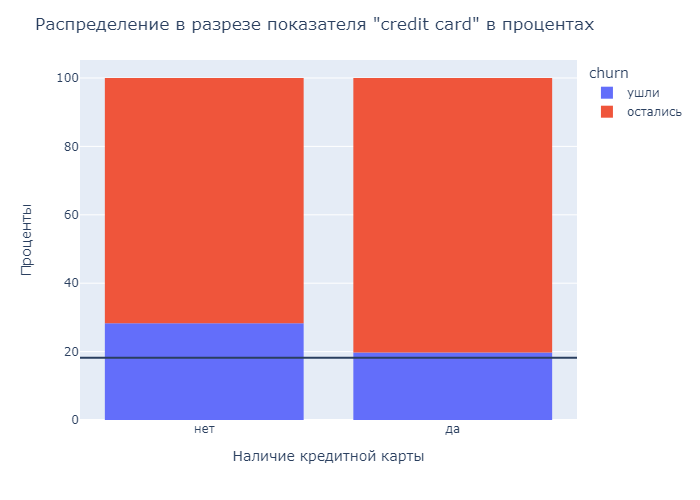

In [70]:
fig = px.histogram(df_balance, x="credit_card", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "сredit сard" в процентах', # Название графика
    xaxis_title_text='Наличие кредитной карты', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

Как видим в обеих группах достатчно высокий процент ухода клиентов. Однако, клиенты, которые не имеют кредитную карту более склонны к уходу.

###  Рассмотрение характеристики "last_activity".

Рассмотрим влияние активности клиента на уход из банка.

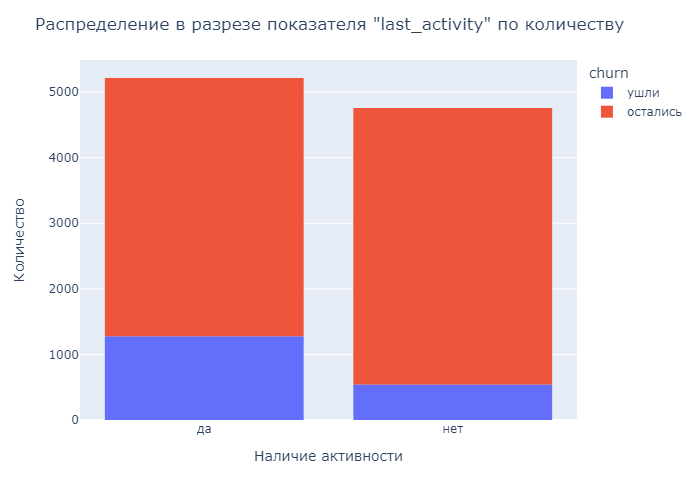

In [71]:
fig = px.histogram(df, x="last_activity", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "last_activity" по количеству', # Название графика
    xaxis_title_text='Наличие активности', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

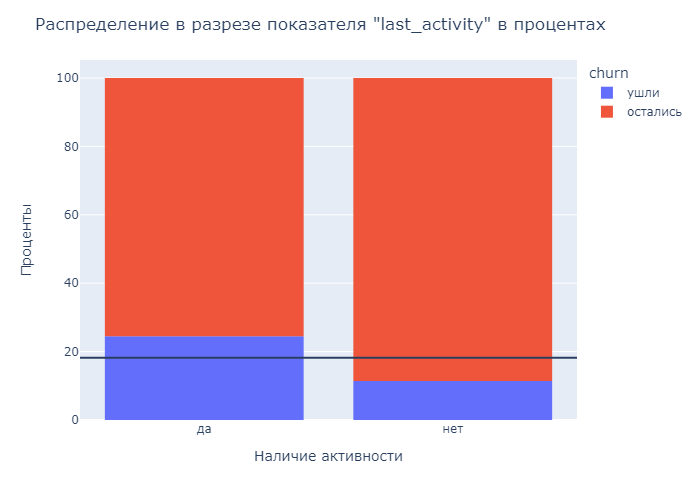

In [72]:
fig = px.histogram(df, x="last_activity", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "last_activity" в процентах', # Название графика
    xaxis_title_text='Наличие активности', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2) # Уровень оттока по банку
fig.show()

Как видим, данные показывают, что больше всего уходят активные клиенты. Возможно это связано с тем, что активные клиенты сравнивают услуги предоставляемые изучаемым нами банком и услуги сторонних банков. Тем самым они имеют возможность более всесторонне оценить преимущества и недостатки используемого банка и его конкурентов и скорее всего качество услуг используемого банка его не устраивает из-за чего клиенты уходят чаще.

###  Рассмотрение характеристики "est_salary".

Рассмотрим влияние активности клиента на уход из банка. Перед построением графиков, узнаем распределение заработной платы клиентов в банке.

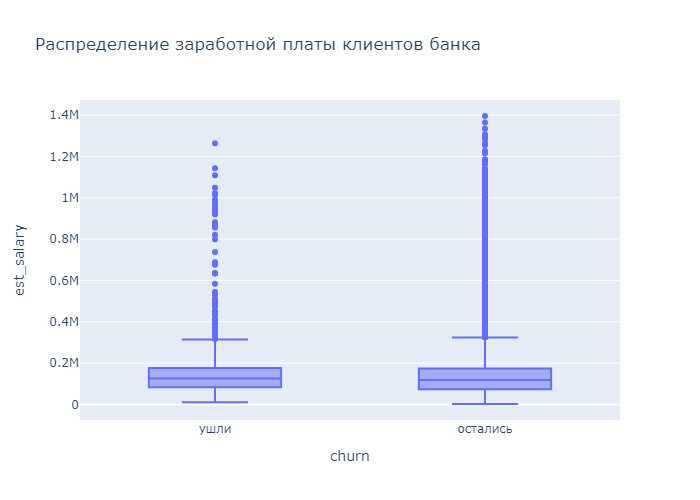

In [73]:
fig = px.box(df, x="churn", y="est_salary", title="Распределение заработной платы клиентов банка")
fig.show()

Верхней планкой в распределении клиентов по заработной плате не входящих в выбросы можно взять верхнюю границу оставшихся клинтов, а именно примерно 325 000.

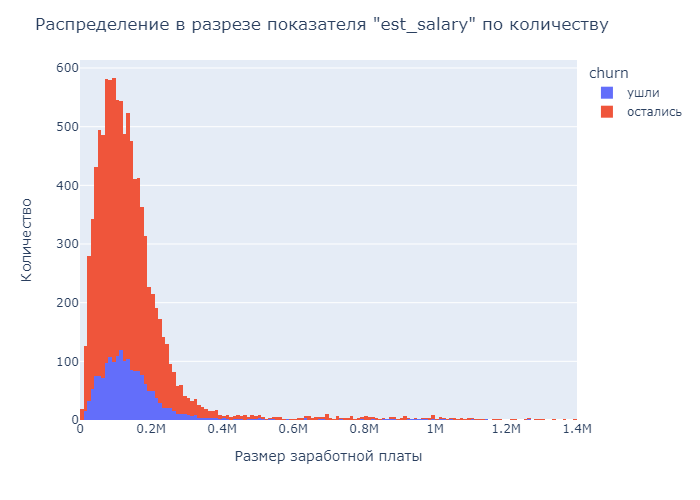

In [74]:
fig = px.histogram(df, x="est_salary", color="churn")
fig.update_layout(
    title_text='Распределение в разрезе показателя "est_salary" по количеству', # Название графика
    xaxis_title_text='Размер заработной платы', # Название оси Х
    yaxis_title_text='Количество', # Название оси У
)
fig.show()

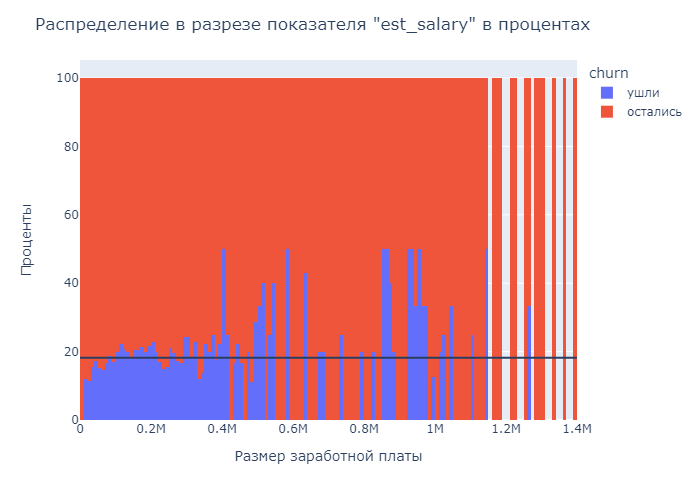

In [75]:
fig = px.histogram(df, x="est_salary", color="churn", barnorm = "percent")
fig.update_layout(
    title_text='Распределение в разрезе показателя "est_salary" в процентах', # Название графика
    xaxis_title_text='Размер заработной платы', # Название оси Х
    yaxis_title_text='Проценты', # Название оси У
)
fig.add_hline(y = 18.2)
fig.show()

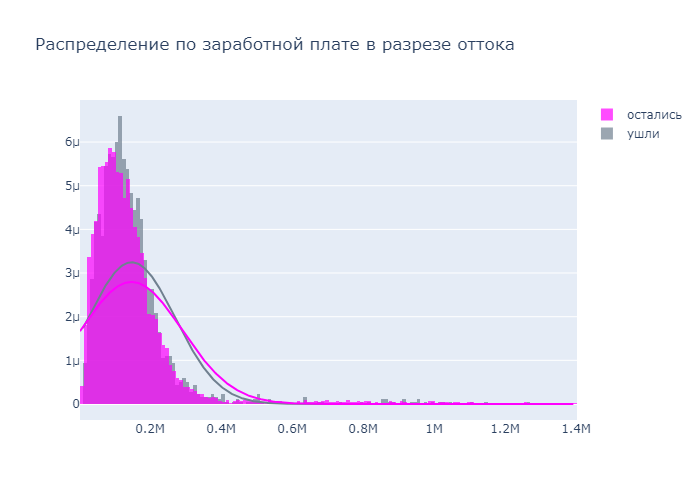

In [76]:
x1 = df_1['est_salary']
x2 = df_0['est_salary']

group_labels = ['ушли', 'остались']

colors = ['slategray', 'magenta']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=10000,
                         curve_type='normal', colors=colors, show_rug=False)

fig.update_layout(title_text='Распределение по заработной плате в разрезе оттока')
fig.show()

Исходя из полученных данных и распределения заработка клиентов можно выделить следующие группы склонные к оттоку: 1) клиенты с заработной платой 80 - 220 тыс. 2) клиенты с заработной платой 250 - 270 тыс. 3) клиенты с заработной платой 290 -330 тыс.

Выполним Анализ признаков в разрезе оттока. Ввыедем переменную по которой будем проверять влияние признаков по банку.

In [77]:
df_outflow = df

In [78]:
df_outflow.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,нет,да,75719.14,ушли
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,да,нет,86621.77,остались
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,да,да,107683.34,остались
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,нет,да,174423.53,ушли
4,157978,730.0,Ярославль,М,34,5,174.00,1,да,нет,67353.16,ушли


Добавим новый столбец в df_outflow.

In [79]:
df_outflow['city_code'] = df_outflow['city']

In [80]:
df_outflow['city_code'] = df_outflow['city_code'].replace({'Ярославль': 1, 'Рыбинск': 2, 'Ростов' : 3}) # Закодируем города

In [81]:
df_outflow.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_code
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,нет,да,75719.14,ушли,2
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,да,нет,86621.77,остались,2
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,да,да,107683.34,остались,2
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,нет,да,174423.53,ушли,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,да,нет,67353.16,ушли,1


Создадим 2 переменные, где сохраним одельно значения ушедших и оставшихся клиентов.

In [82]:
df_outflow_1 = df_outflow.query('churn == "ушли"') # Данные с ушедшими клиентами

In [83]:
df_outflow_0 = df_outflow.query('churn == "остались"') # Данные с оставшимися клиентами

In [84]:
df_outflow_1['credit_card'] = df_outflow_1['credit_card'].replace({'нет': 0, 'да': 1})

In [85]:
df_outflow_1['last_activity'] = df_outflow_1['last_activity'].replace({'нет': 0, 'да': 1})

In [86]:
df_outflow_0['credit_card'] = df_outflow_0['credit_card'].replace({'нет': 0, 'да': 1})

In [87]:
df_outflow_0['last_activity'] = df_outflow_0['last_activity'].replace({'нет': 0, 'да': 1})

In [88]:
df_outflow_1.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_code
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,ушли,2
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,ушли,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,ушли,1
12,132970,845.0,Ярославль,Ж,31,3,591928.52,2,1,1,112697.16,ушли,1
40,129705,811.0,Рыбинск,М,34,2,129799.35,1,0,0,96242.71,ушли,2


In [89]:
df_outflow_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 9994
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        1819 non-null   int64  
 1   score          1819 non-null   float64
 2   city           1819 non-null   object 
 3   gender         1819 non-null   object 
 4   age            1819 non-null   int64  
 5   equity         1819 non-null   int64  
 6   balance        1806 non-null   float64
 7   products       1819 non-null   int64  
 8   credit_card    1819 non-null   int64  
 9   last_activity  1819 non-null   int64  
 10  est_salary     1819 non-null   float64
 11  churn          1819 non-null   object 
 12  city_code      1819 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 199.0+ KB


In [90]:
df_outflow_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8155 entries, 1 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        8155 non-null   int64  
 1   score          8155 non-null   float64
 2   city           8155 non-null   object 
 3   gender         8155 non-null   object 
 4   age            8155 non-null   int64  
 5   equity         8155 non-null   int64  
 6   balance        5889 non-null   float64
 7   products       8155 non-null   int64  
 8   credit_card    8155 non-null   int64  
 9   last_activity  8155 non-null   int64  
 10  est_salary     8155 non-null   float64
 11  churn          8155 non-null   object 
 12  city_code      8155 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 892.0+ KB


In [91]:
 data_norm_out = {'Отток': [round(df_outflow_1['score'].mean(), 2), df_outflow_1['score'].median(), 
                                     statistics.mode(df_outflow_1['city']), statistics.mode(df_outflow_1['gender']), 
                                     df_outflow_1['age'].median(), df_outflow_1['equity'].median(), 
                                     round(df_outflow_1['balance'].mean(), 2), df_outflow_1['balance'].median(), 
                                     df_outflow_1['products'].median(), df_outflow_1['credit_card'].median(), 
                                     df_outflow_1['last_activity'].median(), round(df_outflow_1['est_salary'].mean(), 2), 
                                     df_outflow_1['est_salary'].median(), df_outflow_1['city_code'].median()],
              'Не отток' : [round(df_outflow_0['score'].mean(), 2), df_outflow_0['score'].median(), 
                                     statistics.mode(df_outflow_0['city']), statistics.mode(df_outflow_0['gender']), 
                                     df_outflow_0['age'].median(), df_outflow_0['equity'].median(), 
                                     round(df_outflow_0['balance'].mean(), 2), df_outflow_0['balance'].median(), 
                                     df_outflow_0['products'].median(), df_outflow_0['credit_card'].median(), 
                                     df_outflow_0['last_activity'].median(), round(df_outflow_0['est_salary'].mean(), 2), 
                                     df_outflow_0['est_salary'].median(), df_outflow_0['city_code'].median()],
            'Относительная разница' : [round(df_outflow_1['score'].mean()/df_outflow_0['score'].mean(), 2), 
                                    round(df_outflow_1['score'].median()/ df_outflow_0['score'].median(), 2), 'Nan', 'Nan',
                                    round(df_outflow_1['age'].median()/df_outflow_0['age'].median(), 2), 
                                        round(df_outflow_1['equity'].median()/df_outflow_0['equity'].median(), 2),
                                        round(df_outflow_1['balance'].mean()/df_outflow_0['balance'].mean(), 2),
                                        round(df_outflow_1['balance'].median()/df_outflow_0['balance'].median(), 2),
                                        df_outflow_1['products'].median()/df_outflow_0['products'].median(),
                                        df_outflow_1['credit_card'].median()/df_outflow_0['credit_card'].median(),
                                        df_outflow_1['last_activity'].median()/df_outflow_0['last_activity'].median(),
                                        round(df_outflow_1['est_salary'].mean()/df_outflow_0['est_salary'].mean(), 2),
                                        round(df_outflow_1['est_salary'].median()/df_outflow_0['est_salary'].median(), 2),
                                        round(df_outflow_1['city_code'].median()/df_outflow_0['city_code'].median(), 2)]}  
# Зададим названия столбцов и значений в них

C:\Users\HP-work\AppData\Local\Temp\ipykernel_704\3149850172.py:23: RuntimeWarning:

divide by zero encountered in double_scalars



In [92]:
 dt_out = pd.DataFrame(data_norm_out, index=['Средний скоринг', 'Медианный скоринг', 'Мода по городу', 'Мода по гендеру', 
                                    'Медианный возраст', 'Медианна собственности', 'Средний баланс', 'Медианный баланс', 
                                    'Медианна количества продуктов', 'Медианна наличия кредитной карты', 
                                    'Медианна активности', 'Средняя заработная плата', 'Медианная заработная плата',   
                                    'Медианна по городу(закодированному)'])
# Создадим переменную с оценкой данных ушедших и оставшихся клиентов.

In [93]:
dt_out

,Отток,Не отток,Относительная разница
Средний скоринг,863.42,845.4,1.02
Медианный скоринг,866.0,848.0,1.02
Мода по городу,Ярославль,Ярославль,Nan
Мода по гендеру,М,Ж,Nan
Медианный возраст,39.0,40.0,0.98
Медианна собственности,4.0,3.0,1.33
Средний баланс,1134458.21,733031.63,1.55
Медианный баланс,783908.9,475410.09,1.65
Медианна количества продуктов,2.0,2.0,1.0
Медианна наличия кредитной карты,1.0,1.0,1.0


Как видим, наибольшую относительную разницу показывают разница в балансе и количестве собственности. Стоит отметить, что к оттоку больше склонны мужчины, а так же то, что активные клиенты больше склонны к оттоку.

### Корреляционный анализ данных

Для проведения корреляционного анализа введем новую переменную, где изменим значения в столбцах на числовые и добавим новые строки, где будут числовые значения данных. Для анализа введем переменную df_corr

In [94]:
df_corr = df

In [95]:
df_corr.drop('city_code', axis= 1 , inplace= True )

Изменим данные в столбце churn.

In [96]:
df_corr['churn'] = df_corr['churn'].replace({'остались': 0, 'ушли' : 1})

Изменим данные в столбце credit_card.

In [97]:
df_corr['credit_card'] = df_corr['credit_card'].replace({'нет': 0, 'да' : 1})

Изменим данные в столбце last_activity.

In [98]:
df_corr['last_activity'] = df_corr['last_activity'].replace({'нет': 0, 'да' : 1})

In [99]:
df_corr = pd.get_dummies(df_corr, columns = ['city', 'gender'])

In [100]:
df_corr.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


In [101]:
df_corr = df_corr.rename (
    columns = ({
        'city_Ростов':'rostov', 'city_Рыбинск':'rybinsk','city_Ярославль':'yaroslavl', 
        'gender_Ж':'female', 'gender_М':'male'}))

In [102]:
df_corr.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


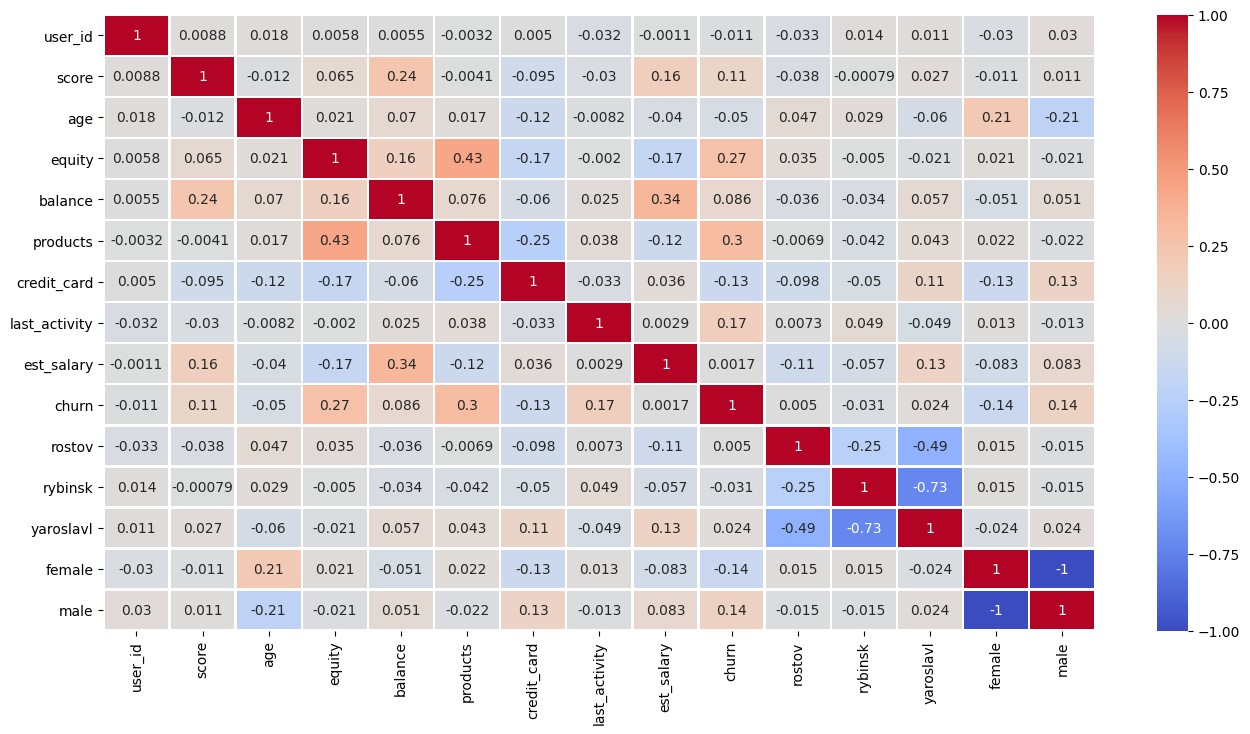

In [103]:
plt.figure(figsize=(16,8))
sns.heatmap (df_corr.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1);

Как видим, наибольшую зависимость в оттоке клиентов в графике показывают такие характеристика как количество используемых продуктов банка клиентом и количество баллов собственности. Данные характеристики имеют не сильно большое влияние на отток. Остальные характеристики оказывают крайне малое влияние на отток клиентов

Выведем столбец корреляции с целевым признаком.

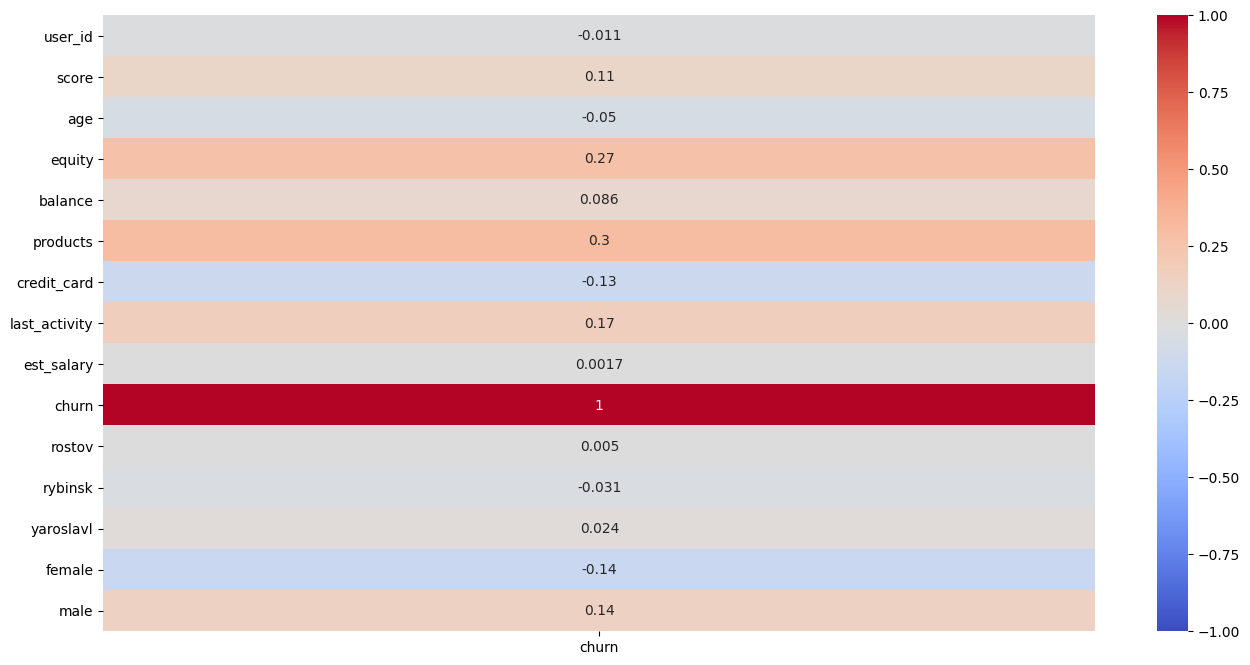

In [104]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr.corr()[['churn']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

Оценивая полученные данные по шкале Чеддока можно сделать выводы, что на уход окахывают слабое влияние такие показатели как гендер, активность клиента, наличие кредитное карты, количество продуктов банка у клиента, количество собственности у клиента, показатель кредитного скоринга. Такие характеристика как город, заработная плата, баланс счета клиента, возраст практически не оказывают никакого влияния на уход клиента.

В данном разделе были сделаны слудующие выводы:
* соотношение оставшихся к ушедшим клиентам банка распределилось так - 81.8% и 18.2% соответственно
* больше всего клиентов чей балл кредитного скоринга равен: 810-814, 820-829, 835-909, 920-934, 940-944, 985-989. Однако, стоит отметить, что количество клиентов чей рейтинг выше 965 очень мало
* самый низкий процент ушедших клиентов в Рыбинске - 16.28%, далее Ростов - 18.71%, далее Ярославль - 19.01%. Прослеживается небольшая разница в оттоке клиентов в зависимости от города.
* мужчины более склонны к уходу из банка. Их показатель ухода почти в 2 раза больше
* клиентов возрастом с 18 до 24 лет и с 65 и старше очень мало. Так же можно заметить, что вероятность ухода высока у клиентом с диапазоном возраста с 25 до 35 лет, а так же с 50 до 60 лет
*  клиенты с характеристикой "equity" более 2 имеет значительную степень вероятности ухода. При этом можно заметит, что число клиентов с характеристикой "equity"от 6 и более очень мало и их число несущественно
* клиенты чей баланс больше 425 000 склонны к уходу, при этом чем больше их баланс от указанной суммы тем выше вероятность их ухода
* клиенты, которые не используют ни одного продукта либо пять практически нет. Основную группу составляют клиенты либо с 1 или 2 продуктами. Начиная с клиентов с 2 продуктами по 4 включительно имеют высокую вероятность того, что они уйдут из банка. При этом с увеличением количества продуктов с 2 до 4 увеличивается и вероятность ухода клиента
*  клиенты, которые не имеют кредитную карту более склонны к уходу
* больше всего уходят активные клиенты. Возможно это связано с тем, что активные клиенты сравнивают услуги предоставляемые изучаемым нами банком и услуги сторонних банков. Тем самым они имеют возможность более всесторонне оценить преимущества и недостатки используемого банка и его конкурентов и скорее всего качество услуг используемого банка его не устраивает из-за чего клиенты уходят чаще
*  можно выделить следующие группы клиентов склонные к оттоку: 1) клиенты с заработной платой 80 - 220 тыс. 2) клиенты с заработной платой 250 - 270 тыс. 3) клиенты с заработной платой 290 -330 тыс.
* наибольшую зависимость в оттоке клиентов показывают такие характеристика как количество используемых продуктов банка клиентом и количество баллов собственности. Данные характеристики имеют не сильно большое влияние на отток. Остальные характеристики оказывают крайне малое влияние на отток клиентов
* оценивая влияние на отток клиена по шкале Чеддока можно сделать выводы, что на уход оказывают слабое влияние такие показатели как гендер, активность клиента, наличие кредитной карты, количество продуктов банка у клиента, количество собственности у клиента, показатель кредитного скоринга. Такие характеристика как город, заработная плата, баланс счета клиента, возраст практически не оказывают никакого влияния на уход клиента.

##  Проверка статистических гипотез.

Перед проверкой статистических гипотез обоснуем выбор метода ее проверки. У нас имееется 2 выборки одной генеральной совокупности с ушедшими и оставшимися клиентами. Данные генеральные совокупности не зависят друг от друга. Выборочные средние для проведения ttest должны быть нормально распределены. Но это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.Исходя из этого, можно сделать вывод, что для проверки гипотез подойдет t-тест. 

Так как выборки разного размера то можно предположить, что дисперсии совокупностей разные, укажем equal_var= False.

Перед началом анализа создадим 2 переменные, где сохраним ушедших клиентов и оставшихся клиентов df_churn_yes и df_churn_no соответсвенно.

In [105]:
df_churn_yes = df.query('churn == 1')

In [106]:
df_churn_no = df.query('churn == 0')

### Различие в доходах между ушедшими и оставшимися клиентами.

Проверим гипотезу о различии в доходах между ушедшими и оставшимися клиентами. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: средние доходы между ушедшими и оставшимися клиентами равны.
Альтернативная гипотеза: средние доходы между ушедшими и оставшимися клиентами не равны.

In [107]:
sample_1 = df_churn_yes['est_salary']
sample_2 = df_churn_no['est_salary']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу о том, что средние доходы между ушедшими и оставшимися клиентами равны отвергнуть не удалось.

### Различия величины баланса счета между ушедшими и оставшимися клиентами.

Проверим гипотезу о различии величины баланса счета между ушедшими и оставшимися клиентами. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: средние величины баланса счета между ушедшими и оставшимися клиентами равны.
Альтернативная гипотеза: средние величины баланса счета между ушедшими и оставшимися клиентами не равны.

У нас имеются пропуски в данном столбце. Перед проведением теста удалим значения и введем переменные, где нет пропущенных значений в столбце 'balance'.

In [108]:
df_churn_yes_balance = df_churn_yes.dropna()

In [109]:
df_churn_no_balance = df_churn_no.dropna()

In [110]:
sample_1 = df_churn_yes_balance['balance']
sample_2 = df_churn_no_balance['balance']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.7317408579113568e-13
Отвергаем нулевую гипотезу


Нулевую гипотезу о том, что средние доходы между ушедшими и оставшимися клиентами равны отвергаем.

### Различия количества баллов собственности между ушедшими и оставшимися клиентами.

Проверим гипотезу о различии количества баллов собственности между ушедшими и оставшимися клиентами. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: средние величины количества баллов собственности между ушедшими и оставшимися клиентами равны. Альтернативная гипотеза: средние величины количества баллов собственности между ушедшими и оставшимися клиентами не равны.

In [111]:
sample_1 = df_churn_yes_balance['equity']
sample_2 = df_churn_no_balance['equity']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.3719608081048351e-33
Отвергаем нулевую гипотезу


Нулевую гипотезу о том, средние величины количества баллов собственности между ушедшими и оставшимися клиентами равны отвергаем

В данном разделе сделаны следующие выводы: 
* гипотезу о том, что средние доходы между ушедшими и оставшимися клиентами равны отвергнуть не удалось
* гипотезу о том, что средние доходы между ушедшими и оставшимися клиентами равны отвергаем
* гипотезу о том, средние величины количества баллов собственности между ушедшими и оставшимися клиентами равны отвергаем

## Сегментация клиентов по признакам рисков отточности.

In [112]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


Исходя из того, что при проверки корреляции больше всего на отток влияли такие показатели как количество баллов собственности и количество продуктов банка полижим их в основу сегментации.

Ранее было изучено, клиенты с каким количеством собственности и количеством банковских продуктов склонны к уходу. Для количества собственности это диапазон от 3 до 5. Для количества продуктов это диапазон 2, 3, 4.

Выделим первый сегмент и проверим его отточность. Первым сегментом будут клиенты с количеством продуктов 2 и количеством собственности 3. Введем переменную для данного сегмента - df_segment1

In [113]:
df_segment1 = df.query('equity == 3 and products == 2') # Cоздадим переменную

In [114]:
df_segment1['churn'].count() # Посчитаем количество клиенов

980

In [115]:
df_segment1_churn = df_segment1.groupby('churn').agg({'churn':'count'}) # Посчитаем количественное значение 
                                                             #ушедших и оставшихся клиентов

In [116]:
df_segment1_churn.columns = ['count'] # Переименуем столбец
df_segment1_churn = df_segment1_churn.reset_index()# Сбросим индекс

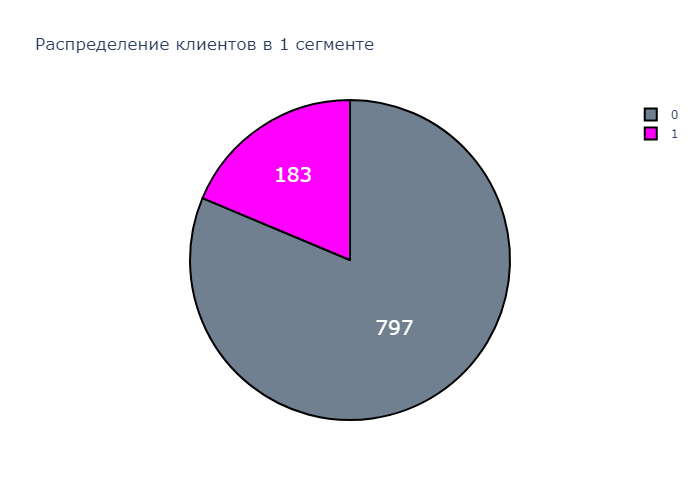

In [117]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df_segment1_churn['churn'],
                             values=df_segment1_churn['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Распределение клиентов в 1 сегменте")
fig.show()

Для первого сегмента значения оствшихся к ушедшим составили в процентном соотношении 81.3% к 18.7%. В количественном 797 к 183.

Выделим второй сегмент и проверим его отточность. Вторым сегментом будут клиенты с такими характеристиками как балл кредитного скоринга и наличие кредитной карты. Ранее было выявлено, что склонны к оттоку клиенты с рейтингом в диапазоне от 835 до 909 и то, что склонны к оттоку клиенты с отсутствием кредитной карты. Введем переменную для данного сегмента - df_segment2

In [118]:
df_segment2 = df.query('835 <= score <= 909 and credit_card == 0') # Cоздадим переменную

In [119]:
df_segment2['churn'].count() # Посчитаем количество клиенов

1487

In [120]:
df_segment2_churn = df_segment2.groupby('churn').agg({'churn':'count'}) # Посчитаем количественное значение 
                                                             #ушедших и оставшихся клиентов

In [121]:
df_segment2_churn.columns = ['count'] # Переименуем столбец
df_segment2_churn = df_segment2_churn.reset_index()# Сбросим индекс

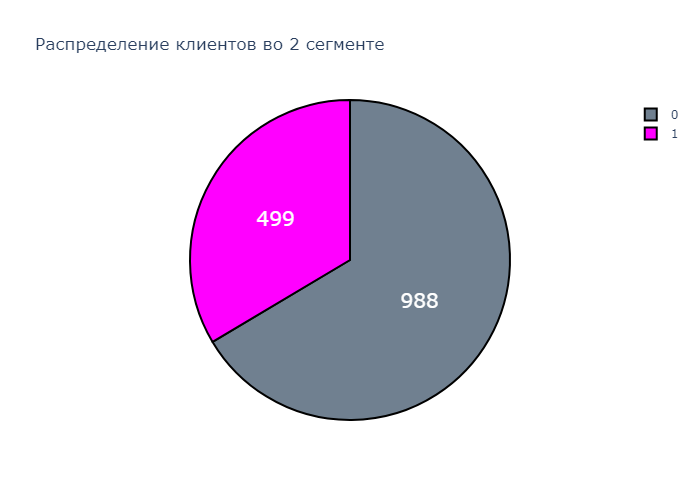

In [122]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df_segment2_churn['churn'],
                             values=df_segment2_churn['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Распределение клиентов во 2 сегменте")
fig.show()

Для второго сегмента значения оствшихся к ушедшим составили в процентном соотношении 66.4% к 33.6%. В количественном 988 к 499.

Выделим третий сегмент и проверим его отточность. Третьим сегментом будут активные клиенты мужского пола. Введем переменную для данного сегмента - df_segment3

In [123]:
df_segment3 = df.query('gender == "М" and last_activity == 1') # Cоздадим переменную

In [124]:
df_segment3['churn'].count() # Посчитаем количество клиенов

2577

In [125]:
df_segment3_churn = df_segment3.groupby('churn').agg({'churn':'count'}) # Посчитаем количественное значение 
                                                             #ушедших и оставшихся клиентов

In [126]:
df_segment3_churn.columns = ['count'] # Переименуем столбец
df_segment3_churn = df_segment3_churn.reset_index()# Сбросим индекс

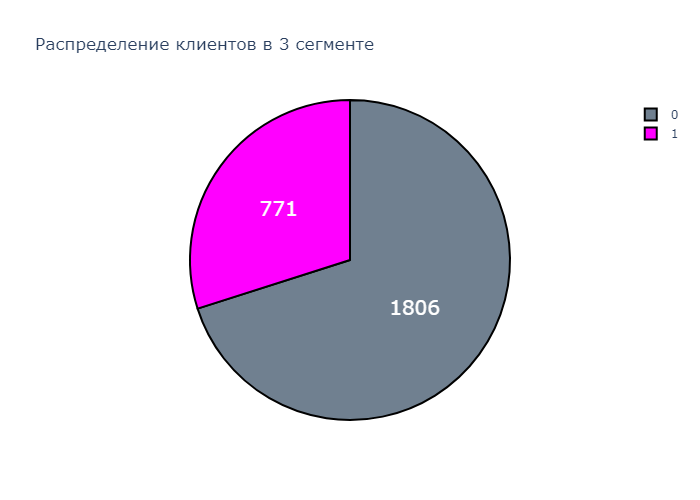

In [127]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df_segment3_churn['churn'],
                             values=df_segment3_churn['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Распределение клиентов в 3 сегменте")
fig.show()

Для третьего сегмента значения оствшихся к ушедшим составили в процентном соотношении 70.1% к 29.9%. В количественном 1806 к 771.

В данном разделе мы выделили 3 сегмента клиентов. По ним были сделаны следующие выводы: 
* клиенты с количеством продуктов 2 и количеством собственности 3 имеют значения оствшихся к ушедшим составили в процентном соотношении 81.3% к 18.7%. В количественном 797 к 183.
* клиенты с баллами кредитного скоринга от 835 до 909 и отсутствием кредитной карты имеют значения оставшихся к ушедшим в процентном соотношении 66.4% к 33.6%. В количественном 988 к 499.
* активные клиенты мужского пола имеют значения оставшихся к ушедшим в процентном соотношении 70.1% к 29.9%. В количественном 1806 к 771. 

## Приоритезация выделенных сегментов.

При проведении приоритезации сегментов будем исходить из абсолютных значений количества ушедших клиентов. Было выделено 3 сегмента.

1. Клиенты с количеством продуктов 2 и количеством собственности 3. Осталось - 797, ушло - 183.  
2. Клиенты с баллами кредитного скоринга от 835 до 909 и отсутствием кредитной карты. Осталось - 988, ушло - 499.  
3. Активные клиенты мужского пола. Осталось - 1806, ушло - 771. 

Исходя из полученных данных приоритет отдается 3 сегменту, затем 2 сегменту и потом 1 сегменту.

В данном разделе были приоритезированы выделенные сегменты. Приоритет по важности - 3 сегмент, 2 сегмент, 1 сегмент.

## Рекомендации для удержания клиентов по сегментам.

Для того, чтобы делать выводы о рекомендациях сегменту, стоит рассмотреть данный сегмент более детально. Какие именно имеют показатели и характеристики ушедшие клиенты. Создадим переменную, в которой сохраним только ушедших клиентов по каждому из сегментов

In [128]:
churn1_yes = df_segment1.query('churn == 1') # Переменная для 1 сегмента

In [129]:
churn1_yes.describe() # Рассмотрим числовые харакеристики

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,183.000000,183.000000,183.000000,183.0,1.830000e+02,183.0,183.000000,183.000000,183.000000,183.0
mean,164615.748634,850.606557,41.928962,3.0,1.012314e+06,2.0,0.519126,0.710383,136272.913060,1.0
std,32367.823337,42.985154,11.114805,0.0,1.528951e+06,0.0,0.501005,0.454829,121775.389467,0.0
min,107121.000000,733.000000,20.000000,3.0,1.501721e+04,2.0,0.000000,0.000000,10880.270000,1.0
25%,136660.500000,820.500000,32.000000,3.0,3.724046e+05,2.0,0.000000,0.000000,76744.485000,1.0
50%,162136.000000,851.000000,40.000000,3.0,6.426460e+05,2.0,1.000000,1.000000,113512.570000,1.0
75%,186899.500000,878.500000,52.000000,3.0,1.199056e+06,2.0,1.000000,1.000000,162703.060000,1.0
max,228900.000000,970.000000,68.000000,3.0,1.500450e+07,2.0,1.000000,1.000000,991012.770000,1.0


Рассмотрим дискретные величины.

In [130]:
churn1_yes_city = churn1_yes.groupby('city').agg({'city':'count'}) # Посчитаем количественное 
                                                             #ушедших клиентов по городам

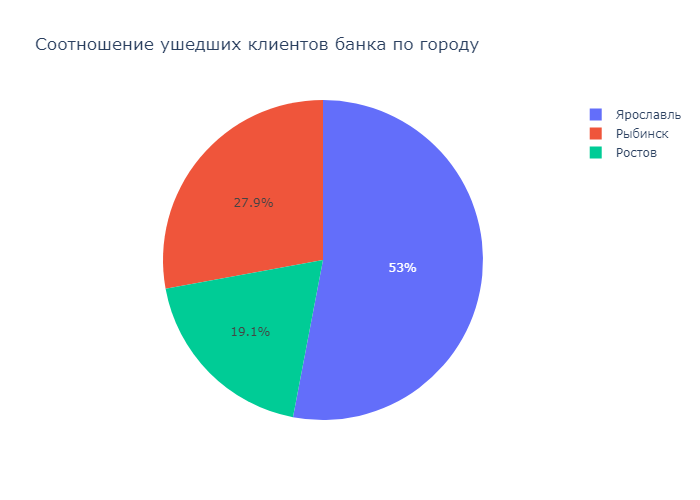

In [131]:
churn1_yes_city.columns = ['count'] # Переименуем столбец
churn1_yes_city = churn1_yes_city.reset_index()# Сбросим индекс
fig = px.pie(churn1_yes_city, values='count',  names='city', title="Соотношение ушедших клиентов банка по городу")
fig.show() #Отобразим графичечки соотношение ушедших клиентов банка по городам.

In [132]:
churn1_yes_gender = churn1_yes.groupby('gender').agg({'gender':'count'}) # Посчитаем количественное 
                                                             #ушедших клиентов по гендеру

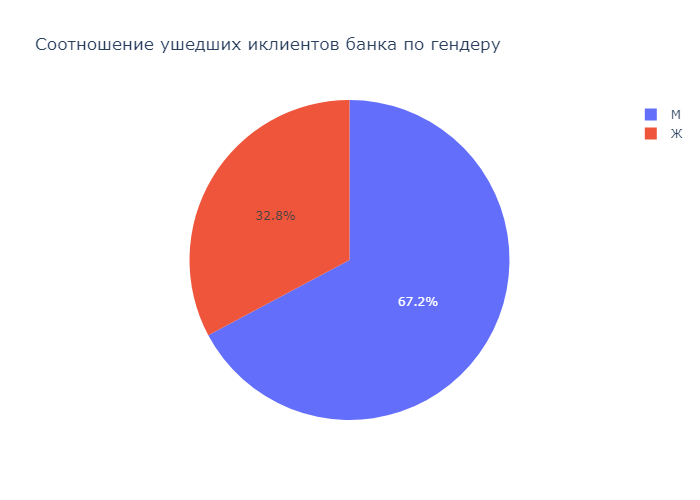

In [133]:
churn1_yes_gender.columns = ['count'] # Переименуем столбец
churn1_yes_gender = churn1_yes_gender.reset_index()# Сбросим индекс
fig = px.pie(churn1_yes_gender, values='count',  names='gender', title="Соотношение ушедших иклиентов банка по гендеру")
fig.show() #Отобразим графичечки соотношение ушедших клиентов банка по гендеру.

В данном сегменте преобладают клиенты со средним рейтингом 850, медианным возрастом 40, медианным балансом 650 000, медианным заработком 114 000, основная часть клиентов проживает в Ярославле, при этом большая часть клиентом мужчины, клиенты являются активными и примерно половина имеет кредитные карты.

Рекомендации для 1 сегмента:  
* предложить оформить кредитную карту;
* предложить льготные условия для получения зарплаты на карту банка; 
* так как основная масса мужчины, предложить кэшбек на товары для спорта и отдыха.
* увеличить рекламу в Ярославле.

In [134]:
churn2_yes = df_segment2.query('churn == 1') # Переменная для 2 сегмента

In [135]:
churn2_yes.describe() # Рассмотрим числовые харакеристики

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000,499.0,499.000000,499.000000,499.0
mean,168531.346693,875.154309,41.527054,4.112224,1.100687e+06,2.310621,0.0,0.817635,141736.972445,1.0
std,35709.957808,20.516773,11.136465,1.380963,9.266819e+05,0.602628,0.0,0.386532,83824.024893,0.0
min,94561.000000,835.000000,20.000000,0.000000,1.501721e+04,1.000000,0.0,0.000000,20528.560000,1.0
25%,138642.500000,858.000000,32.000000,3.000000,5.500173e+05,2.000000,0.0,1.000000,92208.575000,1.0
50%,167518.000000,877.000000,39.000000,4.000000,9.183216e+05,2.000000,0.0,1.000000,130540.120000,1.0
75%,197968.000000,892.000000,52.000000,5.000000,1.389012e+06,3.000000,0.0,1.000000,174107.080000,1.0
max,229058.000000,909.000000,66.000000,9.000000,1.235992e+07,4.000000,0.0,1.000000,874974.770000,1.0


In [136]:
churn2_yes_city = churn2_yes.groupby('city').agg({'city':'count'}) # Посчитаем количественное 
                                                             #ушедших клиентов по городам

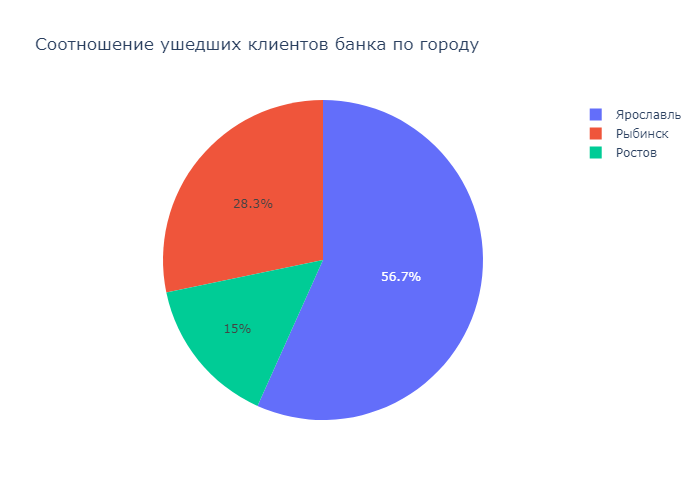

In [137]:
churn2_yes_city.columns = ['count'] # Переименуем столбец
churn2_yes_city = churn2_yes_city.reset_index()# Сбросим индекс
fig = px.pie(churn2_yes_city, values='count',  names='city', title="Соотношение ушедших клиентов банка по городу")
fig.show() #Отобразим графичечки соотношение ушедших клиентов банка по городам.

In [138]:
churn2_yes_gender = churn2_yes.groupby('gender').agg({'gender':'count'}) # Посчитаем количественное 
                                                             #ушедших клиентов по гендеру

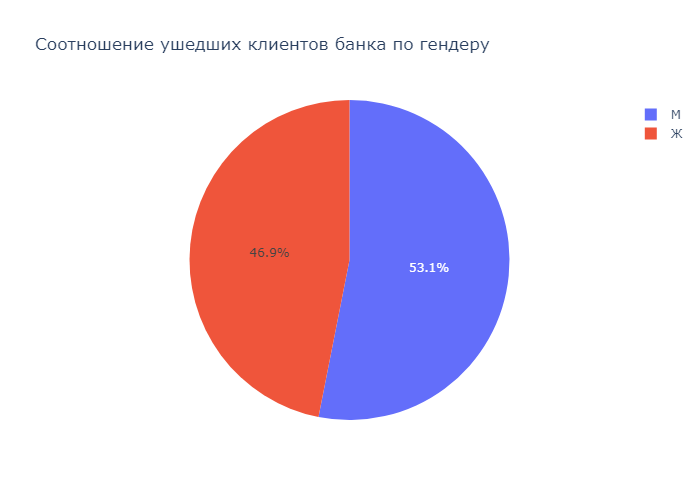

In [139]:
churn2_yes_gender.columns = ['count'] # Переименуем столбец
churn2_yes_gender = churn2_yes_gender.reset_index()# Сбросим индекс
fig = px.pie(churn2_yes_gender, values='count',  names='gender', title="Соотношение ушедших клиентов банка по гендеру")
fig.show() #Отобразим графичечки соотношение ушедших клиентов банка по гендеру.

В данном сегменте преобладают клиенты со средним скорингом 875, медианным возрастом 39, медианным балансом примерно 920 000, медианным заработком примерно 130 500, основная часть клиентов проживает в Ярославле, при этом распределение клиентов по гендеру примерно одинаково.

Рекомендации для 2 сегмента:  
* предложить оформить кредитную карту;
* предложить льготные условия для получения зарплаты на карту банка; 
* так как распределение по гендеру примерно одинаков предлагать акциии при покупке как косметических средств для женщин так и товаров для отдыха мужчинам.
* увеличить рекламу в Ярославле.

In [140]:
churn3_yes = df_segment3.query('churn == 1') # Переменная для 3 сегмента

In [141]:
churn3_yes.describe() # Рассмотрим числовые харакеристики

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,771.000000,771.000000,771.000000,771.000000,7.690000e+02,771.000000,771.000000,771.0,7.710000e+02,771.0
mean,176140.232166,865.734112,39.487678,3.954604,1.299235e+06,2.341115,0.608301,1.0,1.598899e+05,1.0
std,34972.789169,48.304641,10.888254,1.514180,2.858003e+06,0.947510,0.488447,0.0,1.460389e+05,0.0
min,97131.000000,706.000000,18.000000,0.000000,4.200000e+01,1.000000,0.000000,1.0,1.522279e+04,1.0
25%,148026.500000,833.000000,31.000000,3.000000,4.347241e+05,2.000000,0.000000,1.0,8.501924e+04,1.0
50%,176888.000000,869.000000,37.000000,4.000000,8.295514e+05,2.000000,1.000000,1.0,1.274754e+05,1.0
75%,208730.000000,899.500000,48.000000,5.000000,1.376984e+06,3.000000,1.000000,1.0,1.833168e+05,1.0
max,229058.000000,1000.000000,72.000000,9.000000,6.486621e+07,5.000000,1.000000,1.0,1.263028e+06,1.0


In [142]:
churn3_yes_city = churn3_yes.groupby('city').agg({'city':'count'}) # Посчитаем количественное 
                                                             #ушедших клиентов по городам

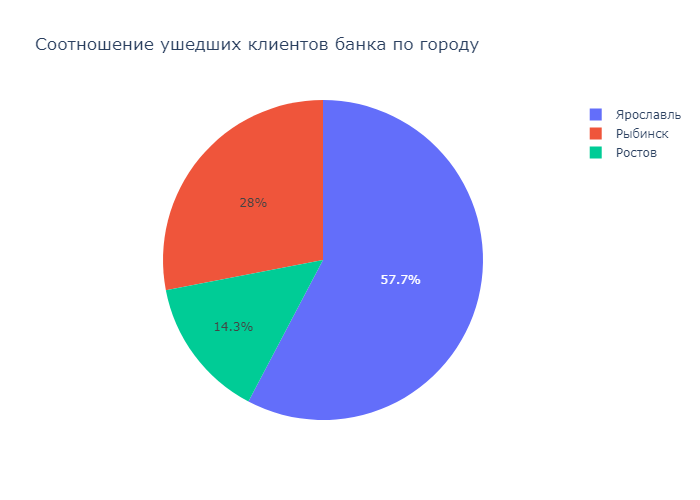

In [143]:
churn3_yes_city.columns = ['count'] # Переименуем столбец
churn3_yes_city = churn3_yes_city.reset_index()# Сбросим индекс
fig = px.pie(churn3_yes_city, values='count',  names='city', title="Соотношение ушедших клиентов банка по городу")
fig.show() #Отобразим графичечки соотношение ушедших клиентов банка по городам.

В данном сегменте преобладают клиенты со средним рейтингом 866, медианным возрастом 37, медианным балансом примерно 830 000, медианным заработком примерно 127 000, основная часть клиентов проживает в Ярославле, примерно 61% имеет кредитные карты.

Рекомендации для 3 сегмента:  
* предложить оформить кредитную карту;
* предложить льготные условия для получения зарплаты на карту банка; 
* так как основная масса мужчины, предложить кэшбек на товары для спорта и отдыха.
* увеличить рекламу в Ярославле.

В данном разделе были проведены детальные разборы сегментов и формулирование рекомендаций.

Свойства 1 сегмента: в данном сегменте преобладают клиенты со средним рейтингом 873, медианным возрастом 37, медианным балансом примерно 825 728, медианным заработком примерно 130 300, основная часть клиентов проживает в Ярославле, при этом большая часть клиентом мужчины, клиенты являются активными и примерно 43% имеет кредитные карты.  
Рекомендации для первого сегмента: 
* предложить оформить кредитную карту;
* предложить льготные условия для получения зарплаты на карту банка; 
* так как основная масса мужчины, предложить кэшбек на товары для спорта и отдыха.
* увеличить рекламу в Ярославле.

Свойства 2 сегмента: В данном сегменте преобладают клиенты со средним скорингом 875, медианным возрастом 39, медианным балансом примерно 920 000, медианным заработком примерно 130 500, основная часть клиентов проживает в Ярославле, при этом распределение клиентов по гендеру примерно одинаково.
Рекомендации для второго сегмента:  
* предложить оформить кредитную карту;
* предложить льготные условия для получения зарплаты на карту банка; 
* так как распределение по гендеру примерно одинаков предлагать акциии при покупке как косметических средств для женщин так и товаров для отдыха мужчинам.
* увеличить рекламу в Ярославле.

Свойства 3 сегмента: В данном сегменте преобладают клиенты со средним рейтингом 866, медианным возрастом 37, медианным балансом примерно 830 000, медианным заработком примерно 127 000, основная часть клиентов проживает в Ярославле, примерно 61% имеет кредитные карты.
Рекомендации для третьего сегмента: 
* предложить оформить кредитную карту;
* предложить льготные условия для получения зарплаты на карту банка; 
* так как основная масса мужчины, предложить кэшбек на товары для спорта и отдыха.
* увеличить рекламу в Ярославле.

## Общие выводы по работе

__В ходе исследования были проделаны следующие работы:__
* Загрузка данных и изучение общей информации
*  Предобработка данных
* Анализ данных, а именно:  
  * Разбор соотношения ушедших и оставшихся клиентов банка
  * Рассмотрение характеристики "score"
  * Рассмотрение характеристики "city"
  * Рассмотрение характеристики "gender"
  * Рассмотрение характеристики "age"
  * Рассмотрение характеристики "equity"
  * Рассмотрение характеристики "balance"
  * Рассмотрение характеристики "products"
  * Рассмотрение характеристики "сredit сard"
  * Рассмотрение характеристики "last_activity"
  * Рассмотрение характеристики "est_salary"
  * Корреляционный анализ данных
* Проверка статистических гипотез, а именно:  
  * Различие в доходах между ушедшими и оставшимися клиентами
  * Различия величины баланса счета между ушедшими и оставшимися клиентами
  * Различия количества баллов собственности между ушедшими и оставшимися клиентами
* Проведена сегментация клиентов по признакам рисков отточности   
* Приоритезированы выделенные сегменты  
* Сформулированы рекомендации для удержания клиентов

__В ходе исследования были сделаны следующие выводы:__ 
* соотношение оставшихся к ушедшим клиентам банка распределилось так - 81.8% и 18.2% соответственно
* больше всего клиентов уходит чей балл кредитного скоринга равен: 810-814, 820-829, 835-909, 920-934, 940-944, 985-989. Однако, стоит отметить, что количество клиентов чей рейтинг выше 965 очень мало
* самый низкий процент ушедших клиентов в Рыбинске - 16.28%, далее Ростов - 18.71%, далее Ярославль - 19.01%. Прослеживается небольшая разница в оттоке клиентов в зависимости от города
* мужчины более склонны к уходу из банка. Их показатель ухода почти в 2 раза больше
* клиентов возрастом с 18 до 24 лет и с 65 и старше очень мало. Так же можно заметить, что вероятность ухода высока у клиентом с диапазоном возраста с 25 до 35 лет, а так же с 50 до 60 лет
*  клиенты с характеристикой "equity" более 2 имеет значительную степень вероятности ухода. При этом можно заметит, что число клиентов с характеристикой "equity"от 6 и более очень мало и их число несущественно
* клиенты чей баланс больше 425 000 склонны к уходу, при этом чем больше их баланс от указанной суммы тем выше вероятность их ухода
* клиенты, которые не используют ни одного продукта либо пять практически нет. Основную группу составляют клиенты либо с 1 или 2 продуктами. Начиная с клиентов с 2 продуктами по 4 включительно имеют высокую вероятность того, что они уйдут из банка. При этом с увеличением количества продуктов с 2 до 4 увеличивается и вероятность ухода клиента
*  клиенты, которые не имеют кредитную карту более склонны к уходу
* больше всего уходят активные клиенты. Возможно это связано с тем, что активные клиенты сравнивают услуги предоставляемые изучаемым нами банком и услуги сторонних банков. Тем самым они имеют возможность более всесторонне оценить преимущества и недостатки используемого банка и его конкурентов и скорее всего качество услуг используемого банка его не устраивает из-за чего клиенты уходят чаще
*  можно выделить следующие группы клиентов склонные к оттоку: 1) клиенты с заработной платой 80 - 220 тыс. 2) клиенты с заработной платой 250 - 270 тыс. 3) клиенты с заработной платой 290 -330 тыс.
* наибольшую зависимость в оттоке клиентов показывают такие характеристика как количество используемых продуктов банка клиентом и количество баллов собственности. Данные характеристики имеют не сильно большое влияние на отток. Остальные характеристики оказывают крайне малое влияние на отток клиентов
* гипотезу о том, что средние доходы между ушедшими и оставшимися клиентами равны отвергнуть не удалось
* гипотезу о том, что средние доходы между ушедшими и оставшимися клиентами равны отвергаем
* гипотезу о том, средние величины количества баллов собственности между ушедшими и оставшимися клиентами равны отвергаем
* сенмент № 1 клиенты с количеством продуктов 2 и количеством собственности 3 имеют значения оствшихся к ушедшим составили в процентном соотношении 81.2% к 18.8%. В количественном 790 к 183.
* сенмент № 2 клиенты с такими характеристиками как балл кредитного скоринга и наличие кредитной карты. Ранее было выявлено, что склонны к оттоку клиенты с рейтингом в диапазоне от 835 до 909 и то, что склонны к оттоку клиенты с отсутствием кредитной карты. Данный сегмент имеет значения оствшихся к ушедшим в процентном соотношении 66.4% к 33.6%. В количественном 988 к 499.
* сенмент № 3 активные клиенты мужского пола имеют значения оствшихся к ушедшим в процентном соотношении 70.1% к 29.9%. В количественном 1806 к 771. 
* приоритет по важности - 3 сегмент, 2 сегмент, 1 сегмент.
* Свойства 1 сегмента: в данном сегменте преобладают клиенты со средним рейтингом 850, медианным возрастом 40, медианным балансом 650 000, медианным заработком 114 000, основная часть клиентов проживает в Ярославле, при этом большая часть клиентом мужчины, клиенты являются активными и примерно половина имеет кредитные карты.
  Рекомендации для первого сегмента: 
    * предложить оформить кредитную карту;
    * предложить льготные условия для получения зарплаты на карту банка; 
    * так как основная масса мужчины, предложить кэшбек на товары для спорта и отдыха.
    * увеличить рекламу в Ярославле.  
* Свойства 2 сегмента: в  данном сегменте преобладают клиенты со средним скорингом 875, медианным возрастом 39, медианным балансом примерно 920 000, медианным заработком примерно 130 500, основная часть клиентов проживает в Ярославле, при этом распределение клиентов по гендеру примерно одинаково.  
  Рекомендации для второго сегмента:  
    * предложить оформить кредитную карту;
    * предложить льготные условия для получения зарплаты на карту банка; 
    * так как распределение по гендеру примерно одинаков предлагать акциии при покупке как косметических средств для женщин       так и товаров для отдыха мужчинам.
    * увеличить рекламу в Ярославле.
* Свойства 3 сегмента: В данном сегменте преобладают клиенты со средним рейтингом 866, медианным возрастом 37, медианным балансом примерно 830 000, медианным заработком примерно 127 000, основная часть клиентов проживает в Ярославле, примерно 61% имеет кредитные карты.  
  Рекомендации для третьего сегмента: 
    * предложить оформить кредитную карту;
    * предложить льготные условия для получения зарплаты на карту банка; 
    * так как основная масса мужчины, предложить кэшбек на товары для спорта и отдыха.
    * увеличить рекламу в Ярославле.